# Objective : Big Mart Sales Prediction
# EDA - Python
# Insights - Patterns
#  Regression

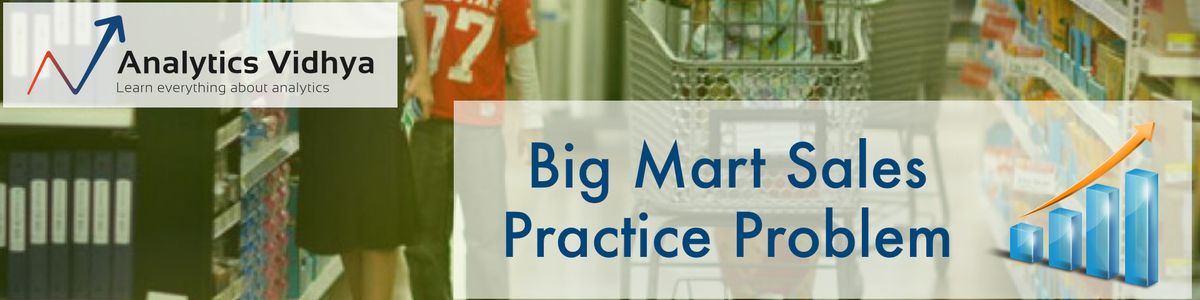

## Sales Prediction for Big Mart Outlets
- The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. 
- Also, certain attributes of each product and store have been defined.
- The aim is to build a predictive model and predict the sales of each product at a particular outlet.

# 1. Import Python Modules

In [63]:
# Load necessary python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Lasso, Ridge,ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error,root_mean_squared_error

from sklearn.metrics import mean_squared_error,r2_score

# 2.  Load Cars Price Dataset

In [64]:
file_path = r"train_v9rqX0R.csv"
train_sales_df = pd.read_csv(file_path)
train_sales_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [65]:
file_path = r"test_AbJTz2l.csv"
test_sales_df = pd.read_csv(file_path)
test_sales_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [66]:
test_sales_df['Item_Outlet_Sales']='test'

In [67]:
sales_df=pd.concat([train_sales_df,test_sales_df],axis=0)
sales_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,test
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,test
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,test
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,test


# 3. Basic Inspection on dataset

In [68]:
def basic_inspection_dataset(table):
    """Generates a basic inspection dataset from the given table."""
    
    print("top 5 rows - using head")
    print(table.head())
    print()
        
    print("bottom 5 rows using tail")
    print(table.tail())
    print()
        
    print("numbers of samples and columns")
    print(table.shape)
    print()
    
    print("numbers of samples ")
    print(len(table))
    print()
    
    print("numbers of entries in the data frame")
    print(table.size)
    print()
    
    print("Columns Names")
    print(table.columns)
    print()

    print("Columns dtypes")
    print(table.dtypes)
    print()
    
    print("Dataframe info")
    print(table.info())
    print()
    
    print()
    print("check the missing value in each column")
    print(table.isnull().sum())
          
    print()
    print("check the missing value in each column")
    print(table.isna().sum())
    
    print()
    print("table summary ")
    print(table.describe())

basic_inspection_dataset(sales_df)

top 5 rows - using head
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      M

In [69]:
sales_df['Outlet_Age']=2024-sales_df.Outlet_Establishment_Year

In [70]:
sales_df.drop("Outlet_Establishment_Year",axis=1,inplace=True)

# 4. Handling Missing Values - Cat

In [71]:
# There is no missing values in cat columns
sales_df["Outlet_Size"].value_counts(dropna=False)

Outlet_Size
Medium    4655
NaN       4016
Small     3980
High      1553
Name: count, dtype: int64

In [72]:
sales_df['Outlet_Size'] =  np.where(sales_df['Outlet_Identifier'] == 'OUT010',"Small",sales_df['Outlet_Size'])
sales_df['Outlet_Size'] =  np.where(sales_df['Outlet_Identifier'] == 'OUT017',"Medium",sales_df['Outlet_Size'])
sales_df['Outlet_Size'] =  np.where(sales_df['Outlet_Identifier'] == 'OUT045',"Medium",sales_df['Outlet_Size'])

In [73]:
sales_df.isna().sum()

Item_Identifier            0
Item_Weight             2439
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size                0
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
Outlet_Age                 0
dtype: int64

In [74]:
sales_df['Item_Identifier']=sales_df['Item_Identifier'].apply(lambda x:x[0:2])

In [75]:
sales_df['Item_Identifier'].value_counts()

Item_Identifier
FD    10201
NC     2686
DR     1317
Name: count, dtype: int64

# 5. Categorical- Variable - Analysis -Using Pipeline

In [76]:
print(sales_df["Item_Fat_Content"].value_counts())
# Mapping subcategories to categories
category_mapping = {
    'Low Fat': 'Low Fat',
    'Regular': 'Regular',
    'LF': 'Low Fat',  
    'reg': 'Regular',
    'low fat': 'Low Fat'
}

# Replacing subcategories with categories
sales_df["Item_Fat_Content"] = sales_df["Item_Fat_Content"].replace(category_mapping)
print(sales_df["Item_Fat_Content"].value_counts())

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64
Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64


In [77]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%0.2f%%', startangle=40)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()  
        
        

In [78]:
sales_df.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

Item_Identifier frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  FD   |   10201   |
| 1 |  NC   |   2686    |
| 2 |  DR   |   1317    |
+---+-------+-----------+
Item_Identifier Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  FD   |   10201   |        71.82         |
| 1 |  NC   |   2686    |        18.91         |
| 2 |  DR   |   1317    |         9.27         |
+---+-------+-----------+----------------------+


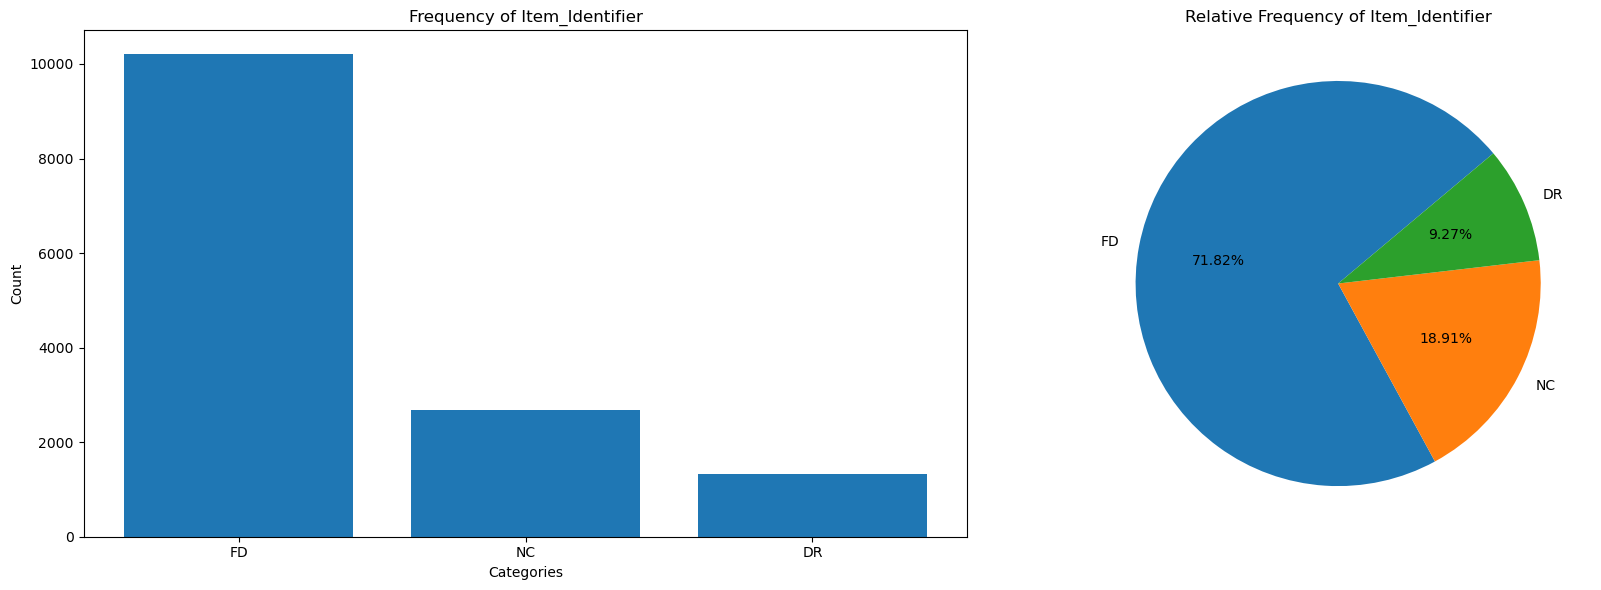

Item_Fat_Content frequency table
+---+---------+-----------+
|   |  Class  | Frequency |
+---+---------+-----------+
| 0 | Low Fat |   9185    |
| 1 | Regular |   5019    |
+---+---------+-----------+
Item_Fat_Content Relative frequency table
+---+---------+-----------+----------------------+
|   |  Class  | Frequency | Relative Frequency % |
+---+---------+-----------+----------------------+
| 0 | Low Fat |   9185    |        64.66         |
| 1 | Regular |   5019    |        35.34         |
+---+---------+-----------+----------------------+


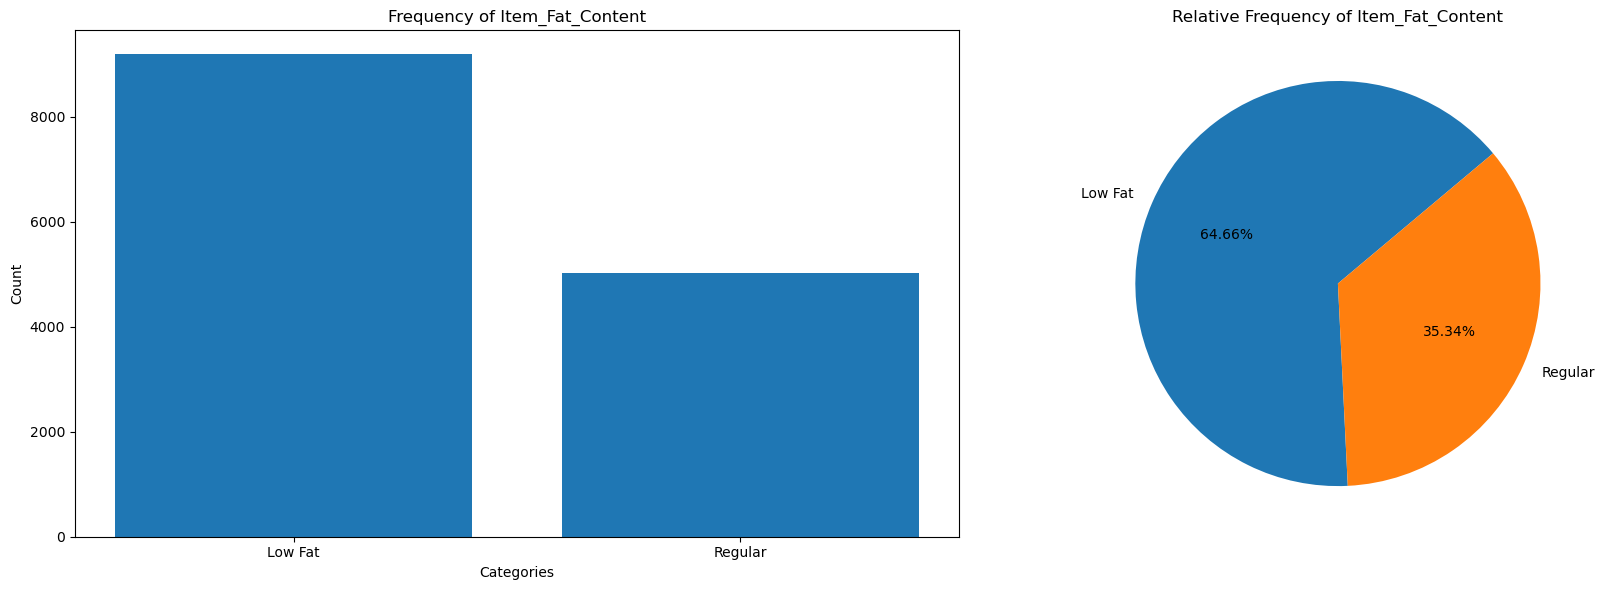

Item_Type frequency table
+----+-----------------------+-----------+
|    |         Class         | Frequency |
+----+-----------------------+-----------+
| 0  | Fruits and Vegetables |   2013    |
| 1  |      Snack Foods      |   1989    |
| 2  |       Household       |   1548    |
| 3  |     Frozen Foods      |   1426    |
| 4  |         Dairy         |   1136    |
| 5  |     Baking Goods      |   1086    |
| 6  |        Canned         |   1084    |
| 7  |  Health and Hygiene   |    858    |
| 8  |         Meat          |    736    |
| 9  |      Soft Drinks      |    726    |
| 10 |        Breads         |    416    |
| 11 |      Hard Drinks      |    362    |
| 12 |        Others         |    280    |
| 13 |     Starchy Foods     |    269    |
| 14 |       Breakfast       |    186    |
| 15 |        Seafood        |    89     |
+----+-----------------------+-----------+
Item_Type Relative frequency table
+----+-----------------------+-----------+----------------------+
|    |       

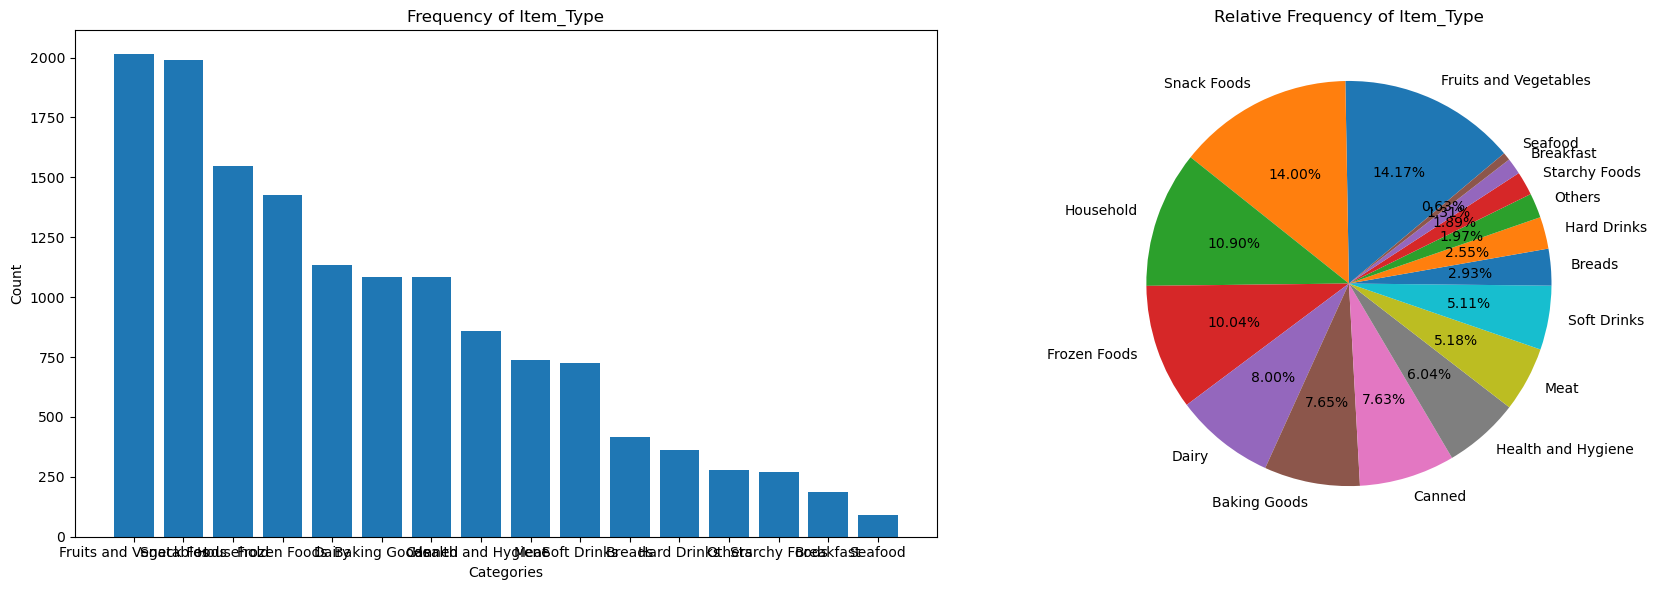

Outlet_Identifier frequency table
+---+--------+-----------+
|   | Class  | Frequency |
+---+--------+-----------+
| 0 | OUT027 |   1559    |
| 1 | OUT013 |   1553    |
| 2 | OUT049 |   1550    |
| 3 | OUT046 |   1550    |
| 4 | OUT035 |   1550    |
| 5 | OUT045 |   1548    |
| 6 | OUT018 |   1546    |
| 7 | OUT017 |   1543    |
| 8 | OUT010 |    925    |
| 9 | OUT019 |    880    |
+---+--------+-----------+
Outlet_Identifier Relative frequency table
+---+--------+-----------+----------------------+
|   | Class  | Frequency | Relative Frequency % |
+---+--------+-----------+----------------------+
| 0 | OUT027 |   1559    |        10.98         |
| 1 | OUT013 |   1553    |        10.93         |
| 2 | OUT049 |   1550    |        10.91         |
| 3 | OUT046 |   1550    |        10.91         |
| 4 | OUT035 |   1550    |        10.91         |
| 5 | OUT045 |   1548    |         10.9         |
| 6 | OUT018 |   1546    |        10.88         |
| 7 | OUT017 |   1543    |        10.86      

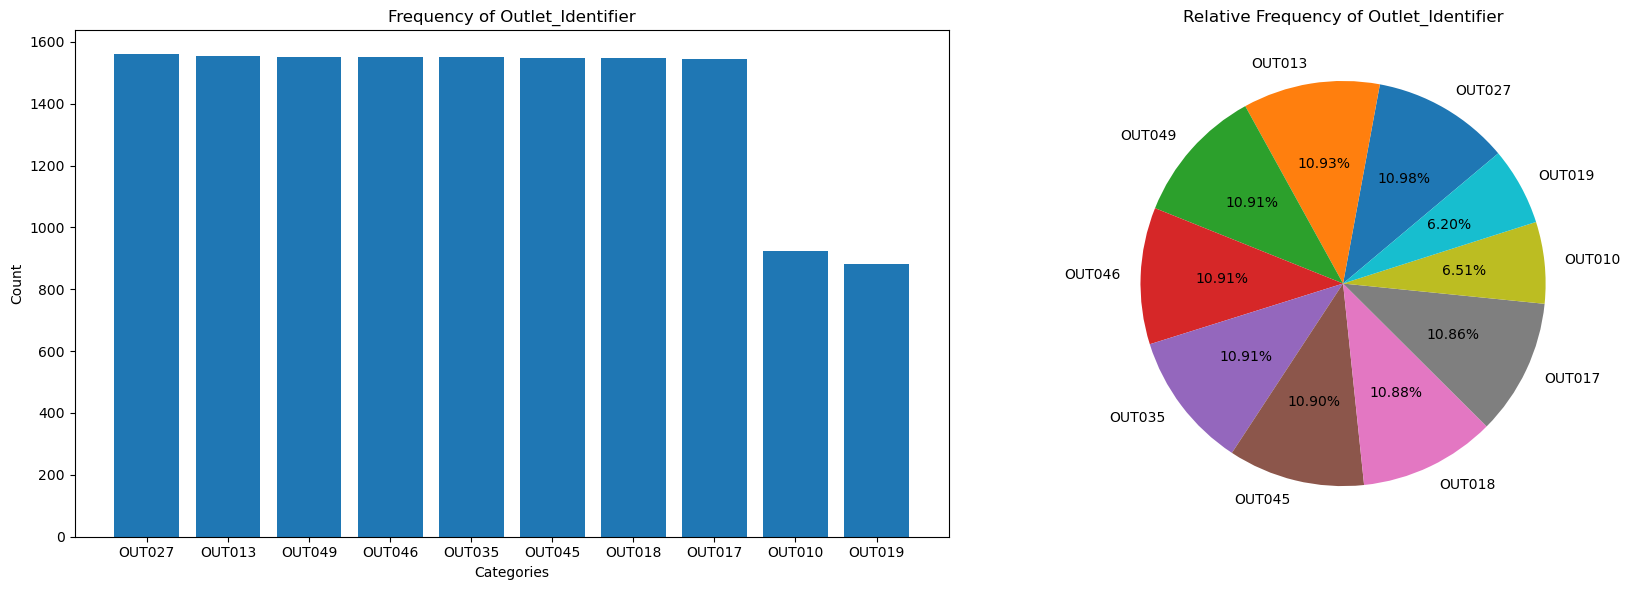

Outlet_Size frequency table
+---+--------+-----------+
|   | Class  | Frequency |
+---+--------+-----------+
| 0 | Medium |   7746    |
| 1 | Small  |   4905    |
| 2 |  High  |   1553    |
+---+--------+-----------+
Outlet_Size Relative frequency table
+---+--------+-----------+----------------------+
|   | Class  | Frequency | Relative Frequency % |
+---+--------+-----------+----------------------+
| 0 | Medium |   7746    |        54.53         |
| 1 | Small  |   4905    |        34.53         |
| 2 |  High  |   1553    |        10.93         |
+---+--------+-----------+----------------------+


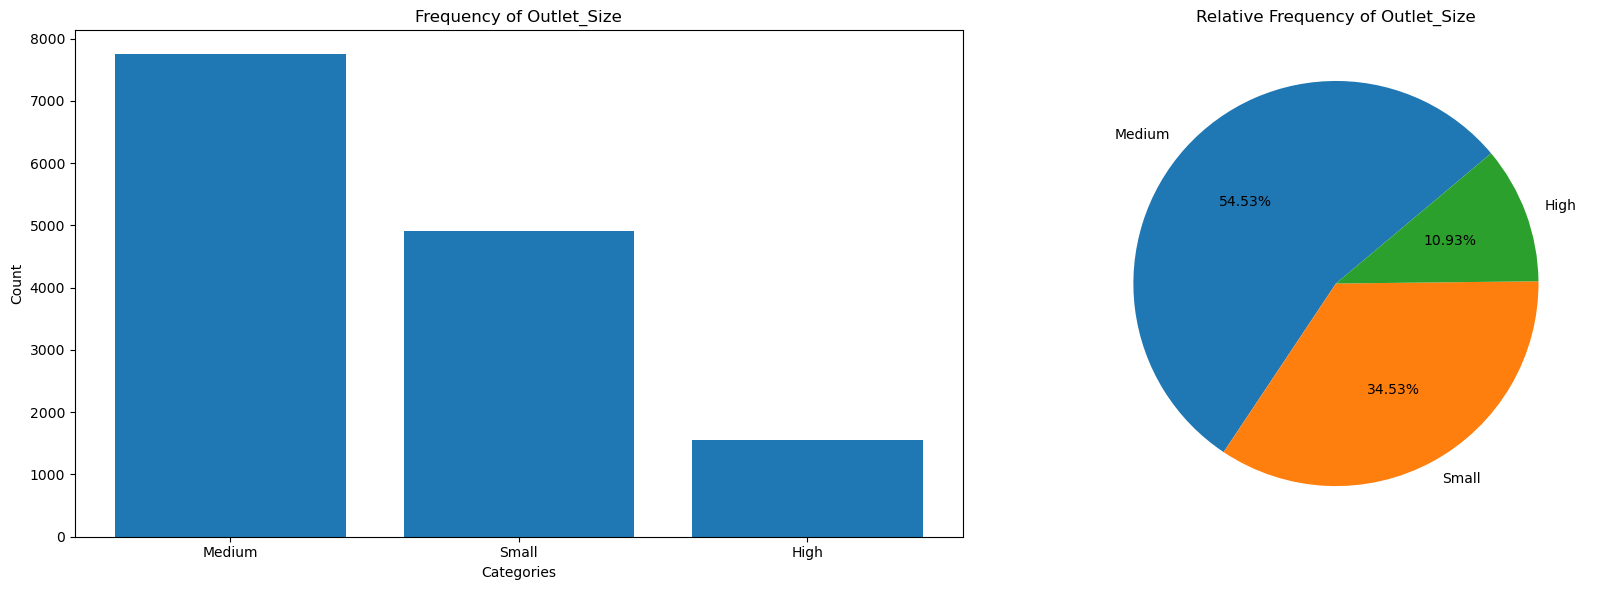

Outlet_Location_Type frequency table
+---+--------+-----------+
|   | Class  | Frequency |
+---+--------+-----------+
| 0 | Tier 3 |   5583    |
| 1 | Tier 2 |   4641    |
| 2 | Tier 1 |   3980    |
+---+--------+-----------+
Outlet_Location_Type Relative frequency table
+---+--------+-----------+----------------------+
|   | Class  | Frequency | Relative Frequency % |
+---+--------+-----------+----------------------+
| 0 | Tier 3 |   5583    |        39.31         |
| 1 | Tier 2 |   4641    |        32.67         |
| 2 | Tier 1 |   3980    |        28.02         |
+---+--------+-----------+----------------------+


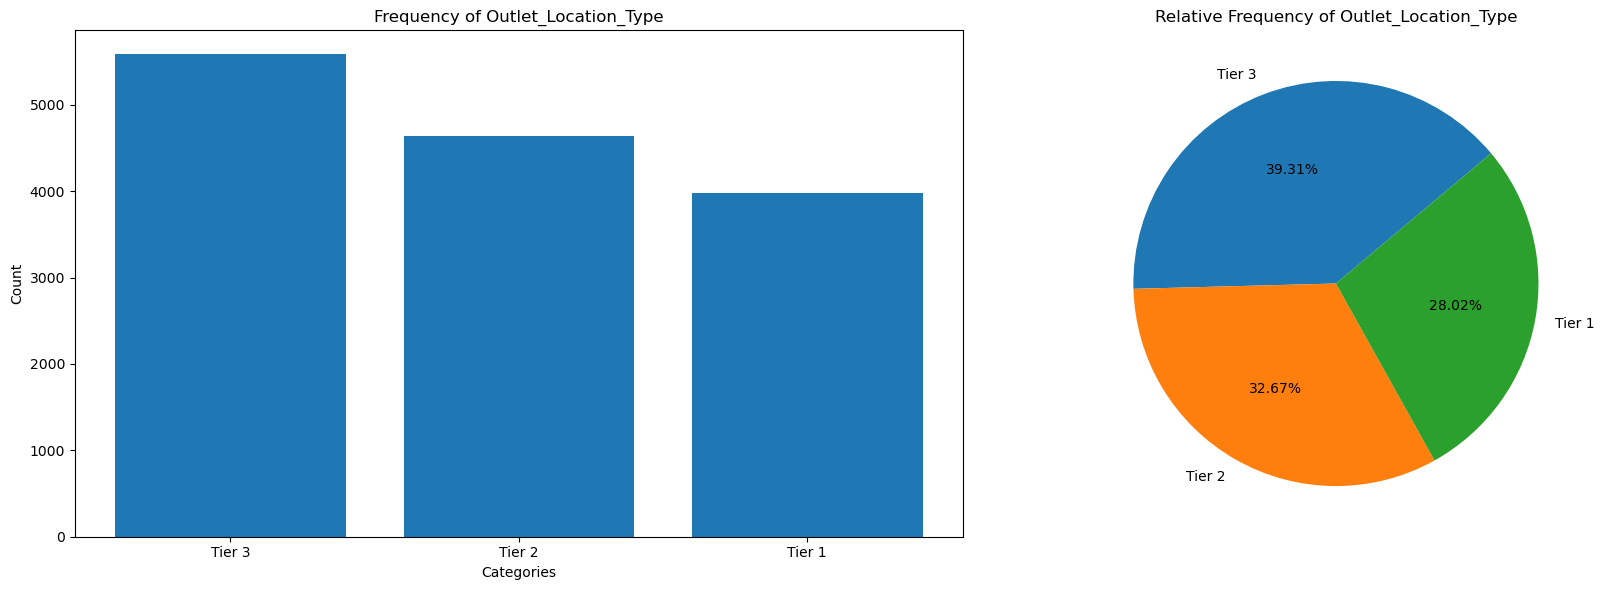

Outlet_Type frequency table
+---+-------------------+-----------+
|   |       Class       | Frequency |
+---+-------------------+-----------+
| 0 | Supermarket Type1 |   9294    |
| 1 |   Grocery Store   |   1805    |
| 2 | Supermarket Type3 |   1559    |
| 3 | Supermarket Type2 |   1546    |
+---+-------------------+-----------+
Outlet_Type Relative frequency table
+---+-------------------+-----------+----------------------+
|   |       Class       | Frequency | Relative Frequency % |
+---+-------------------+-----------+----------------------+
| 0 | Supermarket Type1 |   9294    |        65.43         |
| 1 |   Grocery Store   |   1805    |        12.71         |
| 2 | Supermarket Type3 |   1559    |        10.98         |
| 3 | Supermarket Type2 |   1546    |        10.88         |
+---+-------------------+-----------+----------------------+


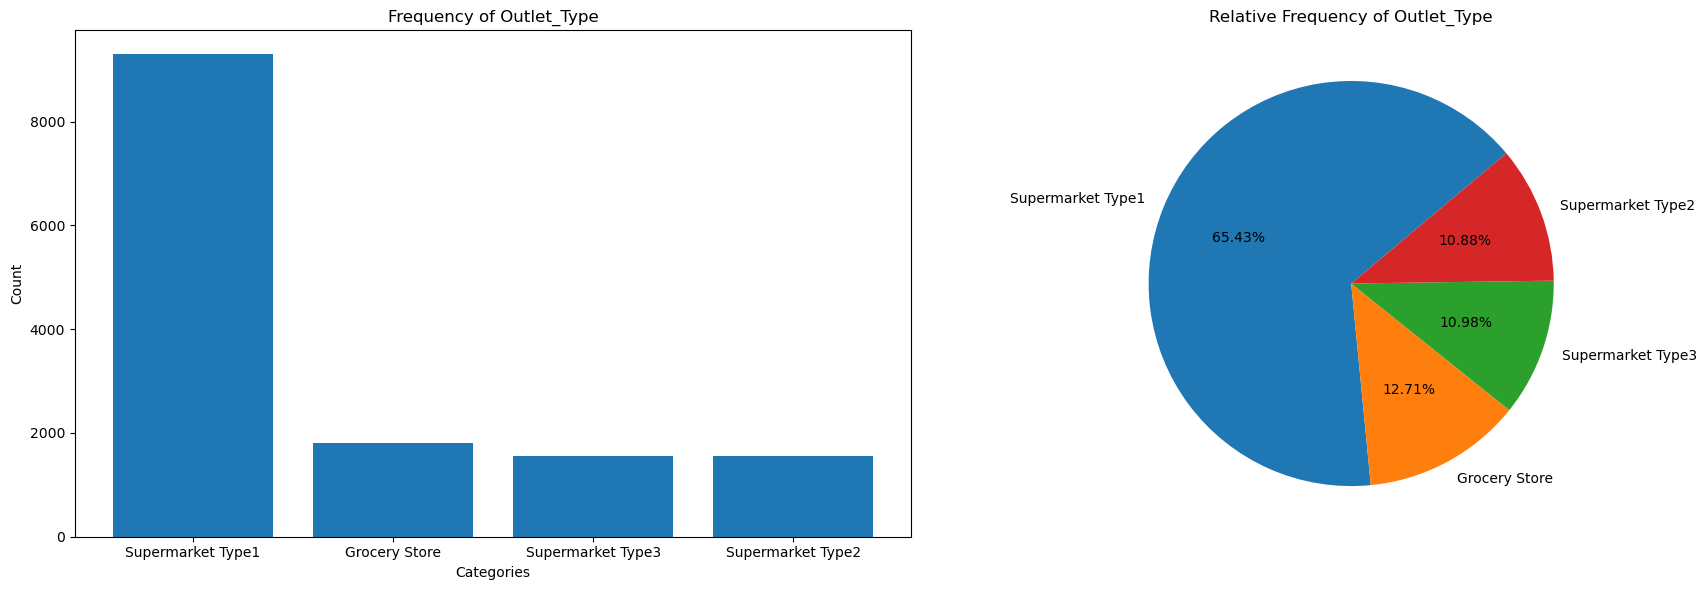

In [79]:
pipeline_cat_var = Pipeline([
    ('bar_pie_chart', BarPieChartTransformer())
])

sales_cat_df = sales_df[['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(sales_cat_df)

$Observations$
1. Super Market Type1 out of Outlet Type has 65%
2. Tier3  out of Location Has 39%
3. Medium out of Outlet Size has 32.77%
4. Low Fat out of Item Fat type -65%
5. Food out of categories 71%

# 6. Handling Missing Values in Numerical Columns

In [80]:
# There is no missing values in num columns

sales_df.isna().sum()

Item_Identifier            0
Item_Weight             2439
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size                0
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
Outlet_Age                 0
dtype: int64

In [81]:
sales_df["Item_Weight"].describe()

count    11765.000000
mean        12.792854
std          4.652502
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: Item_Weight, dtype: float64

In [82]:
sales_df["Item_Weight"].fillna(sales_df["Item_Weight"].median(),inplace=True)

In [83]:
sales_df.isna().sum()

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Outlet_Age              0
dtype: int64

# 7. Numerical - Variables - Analysis - Using -Pipeline

In [84]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:
               
            
            # Create a figure and axes object
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var], color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()
        


In [85]:
sales_df.select_dtypes(exclude='object').columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age'], dtype='object')

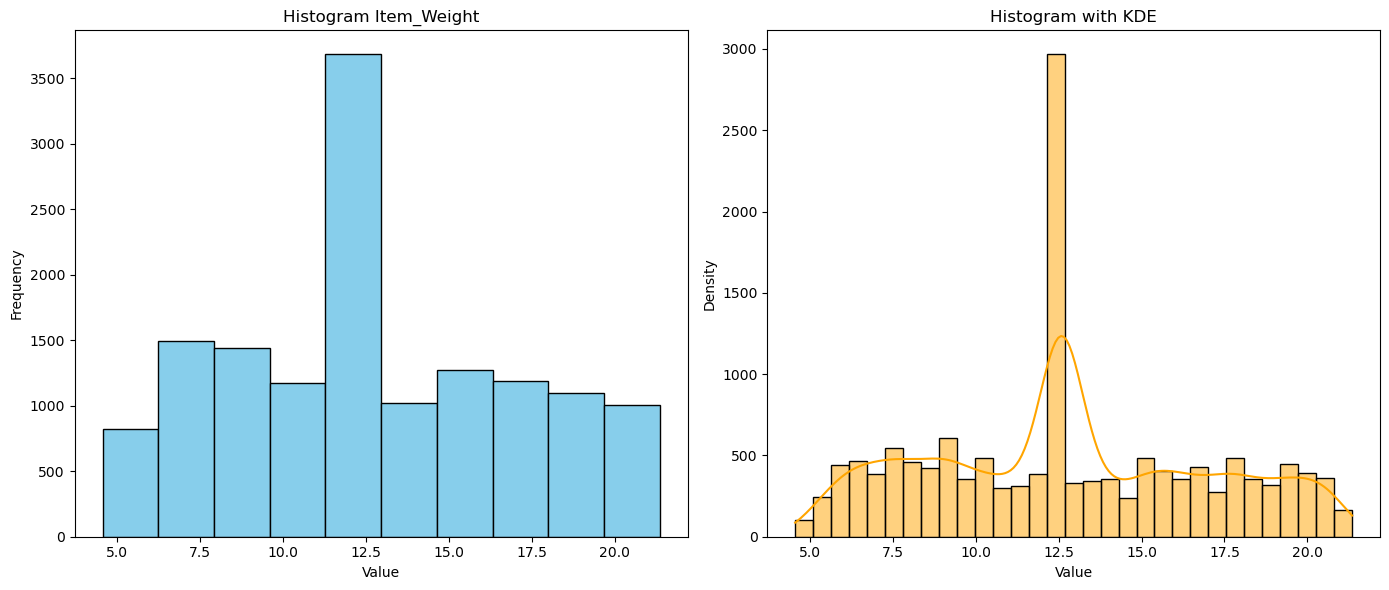

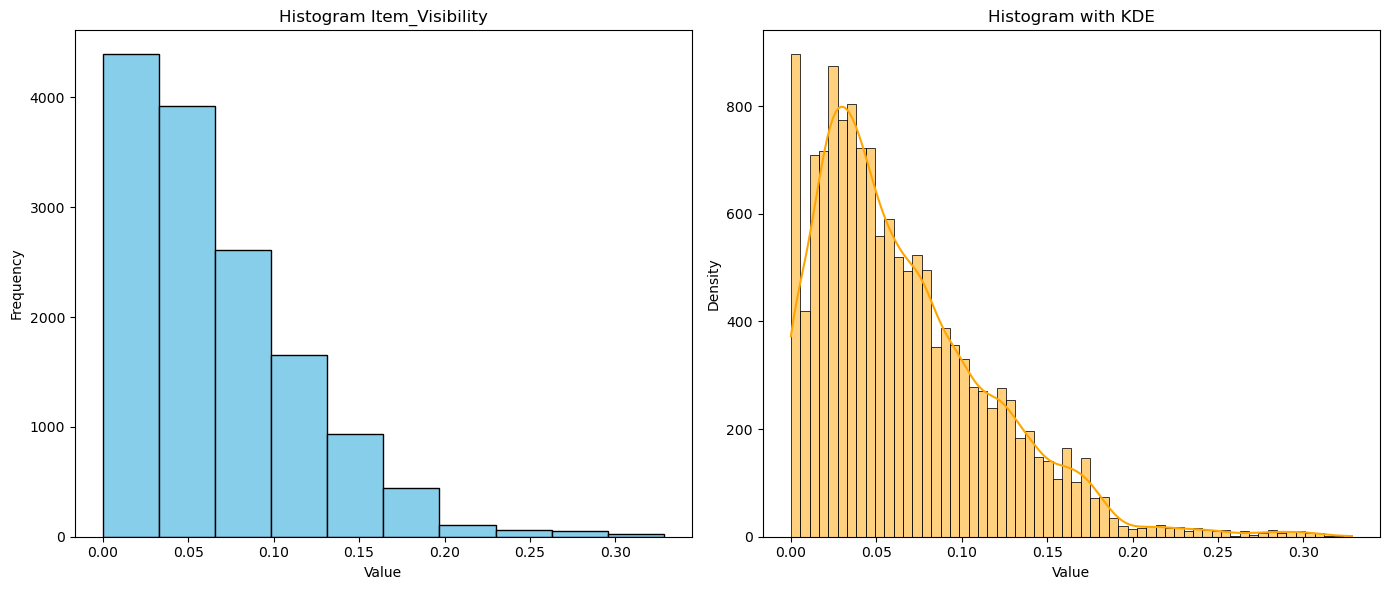

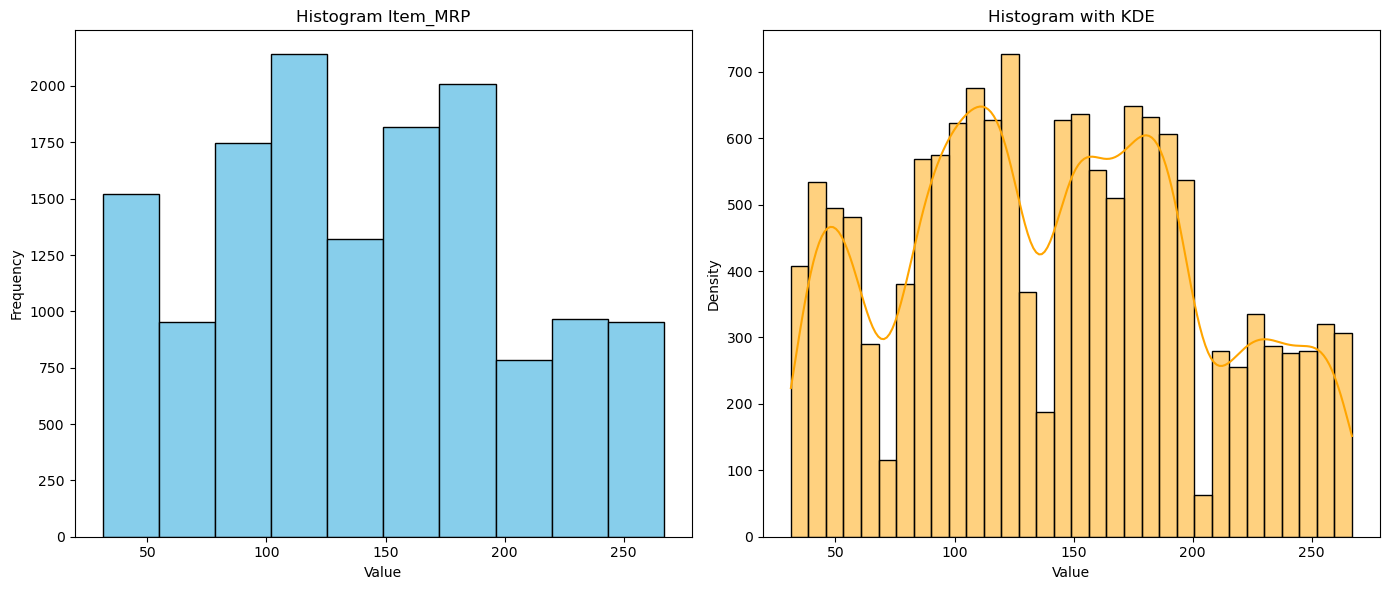

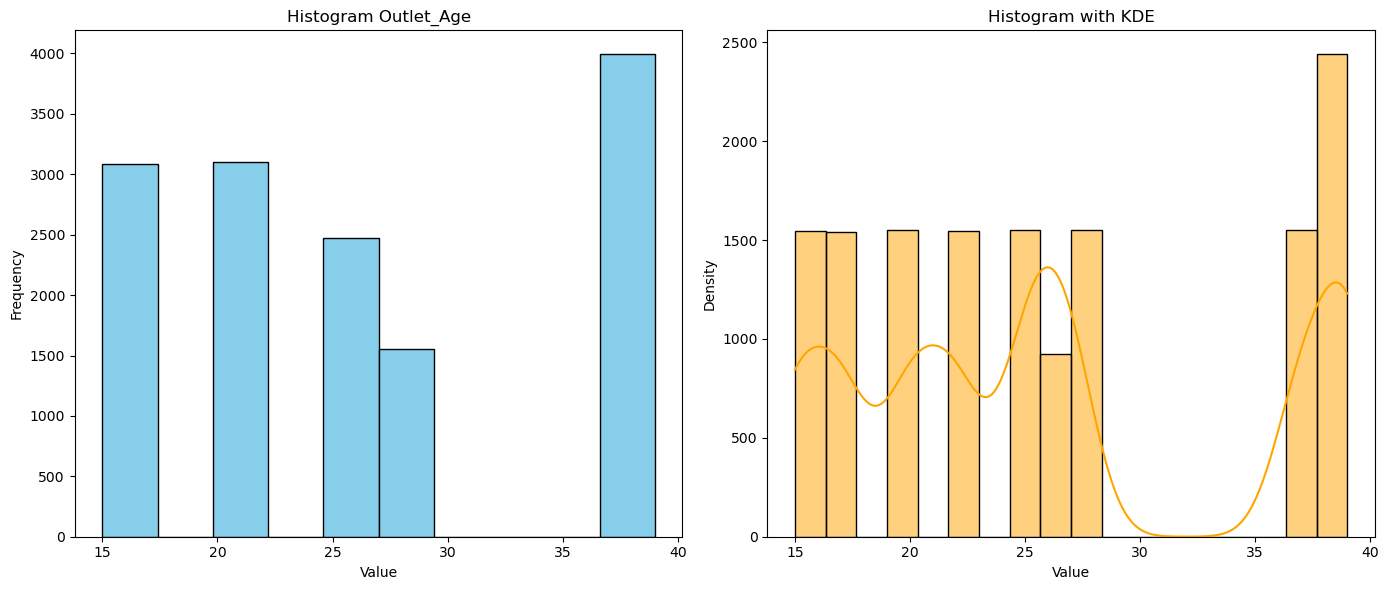

In [86]:
pipeline_num_var = Pipeline([
    ('hist_box_chart', HistBoxChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(sales_df)

In [87]:
sales_df['Item_Visibility'] =  np.where(sales_df['Item_Visibility'] < 0.19,True,False)

In [88]:
sales_df['Item_MRP'] =  np.where(sales_df['Item_MRP'] <69,"A",
                              np.where(sales_df['Item_MRP'] <136,"B",
                                       np.where(sales_df['Item_MRP'] <203,"C","D")))

In [89]:
sales_df['Item_Visibility']=sales_df['Item_Visibility'].astype('object')

In [90]:
categorical_features =  np.where(sales_df.dtypes == object )[0]
categorical_features

array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [91]:
sales_df.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [92]:
sales_df.dtypes

Item_Identifier          object
Item_Weight             float64
Item_Fat_Content         object
Item_Visibility          object
Item_Type                object
Item_MRP                 object
Outlet_Identifier        object
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales        object
Outlet_Age                int64
dtype: object

 # 8. Numerical - Variables -Outliers Analysis

# 9. Bi Variate Analysis

# 10. Data Transformation

# 11. Standization - Normalization

In [93]:
scaler = MinMaxScaler()

# Columns to scale
columns_to_scale = ['Item_Weight', 'Outlet_Age']

for var in columns_to_scale:
# Fit and transform the scaler on the selected columns
    scaled_column = scaler.fit_transform(sales_df[[var]])
    sales_df[var+"_MinMax"]=scaled_column
print(sales_df)

     Item_Identifier  Item_Weight Item_Fat_Content Item_Visibility  \
0                 FD         9.30          Low Fat            True   
1                 DR         5.92          Regular            True   
2                 FD        17.50          Low Fat            True   
3                 FD        19.20          Regular            True   
4                 NC         8.93          Low Fat            True   
...              ...          ...              ...             ...   
5676              FD        10.50          Regular            True   
5677              FD         7.60          Regular            True   
5678              NC        10.00          Low Fat            True   
5679              FD        15.30          Regular            True   
5680              FD         9.50          Regular            True   

                  Item_Type Item_MRP Outlet_Identifier Outlet_Size  \
0                     Dairy        D            OUT049      Medium   
1               Sof

# 12. Convert Cat - to - Numerical Columns

In [94]:
sales_cat_df=sales_df.drop(['Item_Outlet_Sales'],axis=1)
sales_cat_df_dummy=pd.get_dummies(sales_cat_df)

In [95]:
final_df=sales_cat_df_dummy.copy()

In [96]:
final_df['Item_Outlet_Sales']=sales_df.Item_Outlet_Sales

In [97]:
final_df

,Item_Weight,Outlet_Age,Item_Weight_MinMax,Outlet_Age_MinMax,Item_Identifier_DR,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Visibility_False,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,9.30,25,0.282525,0.416667,False,True,False,True,False,False,...,True,False,True,False,False,False,True,False,False,3735.138
1,5.92,15,0.081274,0.000000,True,False,False,False,True,False,...,True,False,False,False,True,False,False,True,False,443.4228
2,17.50,25,0.770765,0.416667,False,True,False,True,False,False,...,True,False,True,False,False,False,True,False,False,2097.27
3,19.20,26,0.871986,0.458333,False,True,False,False,True,False,...,False,True,False,False,True,True,False,False,False,732.38
4,8.93,37,0.260494,0.916667,False,False,True,True,False,False,...,False,False,False,False,True,False,True,False,False,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.50,27,0.353974,0.500000,False,True,False,False,True,False,...,False,True,True,False,False,False,True,False,False,test
5677,7.60,15,0.181304,0.000000,False,True,False,False,True,False,...,True,False,False,False,True,False,False,True,False,test
5678,10.00,22,0.324204,0.291667,False,False,True,True,False,False,...,True,False,False,True,False,False,True,False,False,test
5679,15.30,17,0.639774,0.083333,False,True,False,False,True,False,...,True,False,False,True,False,False,True,False,False,test


In [98]:
train_df=final_df[final_df.Item_Outlet_Sales!='test']
test_df=final_df[final_df.Item_Outlet_Sales=='test']

In [99]:
print(train_df.shape)
print(test_df.shape)

(8523, 52)
(5681, 52)


## VIF

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
# the independent variables set 
X = train_df[['Item_Weight',  'Outlet_Age']] 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

       feature       VIF
0  Item_Weight  5.458312
1   Outlet_Age  5.458312


In [101]:
train_df.columns

Index(['Item_Weight', 'Outlet_Age', 'Item_Weight_MinMax', 'Outlet_Age_MinMax',
       'Item_Identifier_DR', 'Item_Identifier_FD', 'Item_Identifier_NC',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Visibility_False', 'Item_Visibility_True',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Item_MRP_A',
       'Item_MRP_B', 'Item_MRP_C', 'Item_MRP_D', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identif

In [102]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, 0 to 8522
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Outlet_Age                       8523 non-null   int64  
 2   Item_Weight_MinMax               8523 non-null   float64
 3   Outlet_Age_MinMax                8523 non-null   float64
 4   Item_Identifier_DR               8523 non-null   bool   
 5   Item_Identifier_FD               8523 non-null   bool   
 6   Item_Identifier_NC               8523 non-null   bool   
 7   Item_Fat_Content_Low Fat         8523 non-null   bool   
 8   Item_Fat_Content_Regular         8523 non-null   bool   
 9   Item_Visibility_False            8523 non-null   bool   
 10  Item_Visibility_True             8523 non-null   bool   
 11  Item_Type_Baking Goods           8523 non-null   bool   
 12  Item_Type_Breads         

In [103]:
train_df.Item_Outlet_Sales=pd.to_numeric(
    train_df.Item_Outlet_Sales)

C:\Users\91956\AppData\Local\Temp\ipykernel_5676\1814769024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.Item_Outlet_Sales=pd.to_numeric(


# 13. Inferential statistics test

# 14. ML - Linear Regression Model

In [104]:
train_df

,Item_Weight,Outlet_Age,Item_Weight_MinMax,Outlet_Age_MinMax,Item_Identifier_DR,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Visibility_False,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,9.300,25,0.282525,0.416667,False,True,False,True,False,False,...,True,False,True,False,False,False,True,False,False,3735.1380
1,5.920,15,0.081274,0.000000,True,False,False,False,True,False,...,True,False,False,False,True,False,False,True,False,443.4228
2,17.500,25,0.770765,0.416667,False,True,False,True,False,False,...,True,False,True,False,False,False,True,False,False,2097.2700
3,19.200,26,0.871986,0.458333,False,True,False,False,True,False,...,False,True,False,False,True,True,False,False,False,732.3800
4,8.930,37,0.260494,0.916667,False,False,True,True,False,False,...,False,False,False,False,True,False,True,False,False,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,37,0.137541,0.916667,False,True,False,True,False,False,...,False,False,False,False,True,False,True,False,False,2778.3834
8519,8.380,22,0.227746,0.291667,False,True,False,False,True,False,...,True,False,False,True,False,False,True,False,False,549.2850
8520,10.600,20,0.359929,0.208333,False,False,True,True,False,False,...,False,True,False,True,False,False,True,False,False,1193.1136
8521,7.210,15,0.158083,0.000000,False,True,False,False,True,False,...,True,False,False,False,True,False,False,True,False,1845.5976


In [105]:
train_df.columns

Index(['Item_Weight', 'Outlet_Age', 'Item_Weight_MinMax', 'Outlet_Age_MinMax',
       'Item_Identifier_DR', 'Item_Identifier_FD', 'Item_Identifier_NC',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Visibility_False', 'Item_Visibility_True',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Item_MRP_A',
       'Item_MRP_B', 'Item_MRP_C', 'Item_MRP_D', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identif

In [106]:
X=train_df.drop(['Item_Outlet_Sales','Item_Weight', 'Outlet_Age'],axis='columns')
Y=train_df['Item_Outlet_Sales']

In [107]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=42)
print("train data length:",len(X_train))
print("test data length:",len(X_test))


train data length: 5966
test data length: 2557


## 14.1 Linear Regression

## 14.1 Linear Regression

In [108]:
def adjusted_r_squared(y_true, y_pred, n_samples, n_features):
    """
    Calculate the adjusted R-squared score.

    Parameters:
    - y_true: array-like, true target values
    - y_pred: array-like, predicted target values
    - n_samples: int, number of samples (observations)
    - n_features: int, number of features (predictors)

    Returns:
    - adjusted R-squared score
    """
    from sklearn.metrics import r2_score

    r_squared = r2_score(y_true, y_pred)
    adjusted_r_squared = 1 - (1 - r_squared) * ((n_samples - 1) / (n_samples - n_features - 1))
    
    return adjusted_r_squared


In [109]:
model_results = {}
def regression_matrix(model ,X_train,X_test,y_test, model_name):
    print("Model Name ",model_name)
    y_pred = model.predict(X_test)
    train_r2_score=round(model.score(X_train,y_train),3)
    print("train R2 Score:",train_r2_score)
    test_r2_score=round(model.score(X_test,y_test),3)
    print("Test R2 Score:",test_r2_score)
    print("Test R2 score:",r2_score(y_test,y_pred))
    
    mse = round(mean_squared_error(y_test,y_pred),3)
    print("MSE:",mse)
    rmse=round(root_mean_squared_error(y_test,y_pred),3)
    print("RMSE:",rmse)
    adj_r2_score=round(adjusted_r_squared(y_test,y_pred,len(y_test),len(X_train.columns)),3)
    print("Adj-R Score",adj_r2_score)
    
    if abs(train_r2_score - test_r2_score) > .10:
        print("model :" , model_name ,"is overfitting")
    if train_r2_score < 0.50:
        print("model :" , model_name ,"is underfitting")
    
    model_results[model_name]=[train_r2_score,test_r2_score,adj_r2_score,mse,rmse]



In [110]:
lr = LinearRegression()
lr.fit(X_train,y_train)


print("columns:",X_train.columns)
print('Coefficients: ', lr.coef_)
print('Intercept:',lr.intercept_)

regression_matrix(lr ,X_train,X_test,y_test, "LinearReg")

columns: Index(['Item_Weight_MinMax', 'Outlet_Age_MinMax', 'Item_Identifier_DR',
       'Item_Identifier_FD', 'Item_Identifier_NC', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Visibility_False',
       'Item_Visibility_True', 'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Item_MRP_A', 'Item_MRP_B', 'Item_MRP_C',
       'Item_MRP_D', 'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet

### Lasso Regression - L1 

In [112]:
lasso_reg = Lasso(alpha=0.1)  # Regularization strength (alpha) is set to 0.1
lasso_reg.fit(X_train,y_train)


print("columns:",X_train.columns)
print('Coefficients: ', lasso_reg.coef_)
print('Intercept:',lasso_reg.intercept_)

regression_matrix(lasso_reg ,X_train,X_test,y_test, "Lasso")

columns: Index(['Item_Weight_MinMax', 'Outlet_Age_MinMax', 'Item_Identifier_DR',
       'Item_Identifier_FD', 'Item_Identifier_NC', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Visibility_False',
       'Item_Visibility_True', 'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Item_MRP_A', 'Item_MRP_B', 'Item_MRP_C',
       'Item_MRP_D', 'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet

C:\Users\91956\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.726e+07, tolerance: 1.764e+06
  model = cd_fast.enet_coordinate_descent(


### Ridge Regression -L2

In [114]:
ridge_reg = Ridge(alpha=0.1)  # Regularization strength (alpha) is set to 0.1
ridge_reg.fit(X_train,y_train)


print("columns:",X_train.columns)
print('Coefficients: ', ridge_reg.coef_)
print('Intercept:',ridge_reg.intercept_)

regression_matrix(ridge_reg ,X_train,X_test,y_test, "Ridge")

columns: Index(['Item_Weight_MinMax', 'Outlet_Age_MinMax', 'Item_Identifier_DR',
       'Item_Identifier_FD', 'Item_Identifier_NC', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Visibility_False',
       'Item_Visibility_True', 'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Item_MRP_A', 'Item_MRP_B', 'Item_MRP_C',
       'Item_MRP_D', 'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet

### Elastic Net 

In [116]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio controls the balance between L1 and L2 penalties
elastic_net.fit(X_train,y_train)


print("columns:",X_train.columns)
print('Coefficients: ', elastic_net.coef_)
print('Intercept:',elastic_net.intercept_)

regression_matrix(elastic_net ,X_train,X_test,y_test, "ElasticNet")

columns: Index(['Item_Weight_MinMax', 'Outlet_Age_MinMax', 'Item_Identifier_DR',
       'Item_Identifier_FD', 'Item_Identifier_NC', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Visibility_False',
       'Item_Visibility_True', 'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Item_MRP_A', 'Item_MRP_B', 'Item_MRP_C',
       'Item_MRP_D', 'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet

## 14.2 Decision Tree Regression

In [117]:
# Create and fit the model
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
print("Model - Decision Tree Regression")

regression_matrix(model ,X_train,X_test,y_test, "DT")

Model - Decision Tree Regression
Model Name  DT
train R2 Score: 0.916
Test R2 Score: 0.247
Test R2 score: 0.2474394975662363
MSE: 2107917.096
RMSE: 1451.867
Adj-R Score 0.233
model : DT is overfitting


## 14.3 Random Forest Regression

In [118]:
# Create and fit the model
model = RandomForestRegressor()
model.fit(X_train, y_train)
print("Model - Random Forest Regression")

regression_matrix(model ,X_train,X_test,y_test, "RandomForest")

Model - Random Forest Regression
Model Name  RandomForest
train R2 Score: 0.865
Test R2 Score: 0.502
Test R2 score: 0.5023659486435212
MSE: 1393869.757
RMSE: 1180.623
Adj-R Score 0.493
model : RandomForest is overfitting


## 14.4 Support Vector Regression (SVR)

In [119]:
# Create and fit the model
model = SVR(kernel='linear')
model.fit(X_train, y_train)
print("Model - Support Vector Regression ")

regression_matrix(model ,X_train,X_test,y_test, "SVR")

Model - Support Vector Regression 
Model Name  SVR
train R2 Score: 0.307
Test R2 Score: 0.338
Test R2 score: 0.33751057343532176
MSE: 1855628.596
RMSE: 1362.215
Adj-R Score 0.325
model : SVR is underfitting


## 14.5 AdaBoost Regression

In [120]:
# Create and fit the model
ada_boost = AdaBoostRegressor()
ada_boost.fit(X_train, y_train)
print("Model - AdaBoost Regression ")

regression_matrix(ada_boost ,X_train,X_test,y_test, "AdaBoost")

Model - AdaBoost Regression 
Model Name  AdaBoost
train R2 Score: 0.487
Test R2 Score: 0.469
Test R2 score: 0.4688930343353377
MSE: 1487627.173
RMSE: 1219.683
Adj-R Score 0.459
model : AdaBoost is underfitting


## 14.6 Gradient Boosting Regression

In [121]:
# Create and fit the model
gradient_boost = GradientBoostingRegressor()
gradient_boost.fit(X_train, y_train)
print("Model - Gradient Boosting Regression")

regression_matrix(gradient_boost ,X_train,X_test,y_test, "GradientBoost")

Model - Gradient Boosting Regression
Model Name  GradientBoost
train R2 Score: 0.6
Test R2 Score: 0.578
Test R2 score: 0.5784760017734355
MSE: 1180685.991
RMSE: 1086.594
Adj-R Score 0.57


## 14.7 XGBoost Regression

In [122]:
# Create and fit the model
xg_boost = xgb.XGBRegressor()
xg_boost.fit(X_train, y_train)
print("Model-XGBoost Regression")

regression_matrix(xg_boost ,X_train,X_test,y_test, "XGB")

Model-XGBoost Regression
Model Name  XGB
train R2 Score: 0.772
Test R2 Score: 0.505
Test R2 score: 0.5052726790681661
MSE: 1385728.024
RMSE: 1177.169
Adj-R Score 0.496
model : XGB is overfitting


## 15. Summary

In [123]:
print("\n\n")
result=pd.DataFrame(model_results,index=["Train R2","Test R2" ,"Adj R2","MSE","RMSE"])
print(result)
print("\n\n")

print(tabulate(result, headers='keys', tablefmt='pretty'))




            LinearReg        Lasso        Ridge   ElasticNet           DT  \
Train R2        0.498        0.541        0.541        0.518        0.916   
Test R2         0.505        0.549        0.549        0.535        0.247   
Adj R2          0.496        0.540        0.540        0.526        0.233   
MSE       1385413.060  1263822.287  1264182.571  1302784.534  2107917.096   
RMSE         1177.036     1124.199     1124.359     1141.396     1451.867   

          RandomForest          SVR     AdaBoost  GradientBoost          XGB  
Train R2         0.865        0.307        0.487          0.600        0.772  
Test R2          0.502        0.338        0.469          0.578        0.505  
Adj R2           0.493        0.325        0.459          0.570        0.496  
MSE        1393869.757  1855628.596  1487627.173    1180685.991  1385728.024  
RMSE          1180.623     1362.215     1219.683       1086.594     1177.169  



+----------+------------+-------------+-------------+----

# Test

In [124]:
test_df.drop("Item_Outlet_Sales",axis=1,inplace=True)
test_df.drop(['Item_Weight','Outlet_Age'], axis=1,inplace=True)
test_df

C:\Users\91956\AppData\Local\Temp\ipykernel_5676\2446704565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop("Item_Outlet_Sales",axis=1,inplace=True)
C:\Users\91956\AppData\Local\Temp\ipykernel_5676\2446704565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(['Item_Weight','Outlet_Age'], axis=1,inplace=True)


,Item_Weight_MinMax,Outlet_Age_MinMax,Item_Identifier_DR,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Visibility_False,Item_Visibility_True,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.964275,0.416667,False,True,False,True,False,False,True,False,...,False,True,False,True,False,False,False,True,False,False
1,0.222983,0.083333,False,True,False,False,True,False,True,False,...,False,True,False,False,True,False,False,True,False,False
2,0.598095,0.458333,False,False,True,True,False,False,True,False,...,False,False,True,False,False,True,True,False,False,False
3,0.164335,0.083333,False,True,False,True,False,False,True,False,...,False,True,False,False,True,False,False,True,False,False
4,0.479012,1.000000,False,True,False,False,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0.353974,0.500000,False,True,False,False,True,False,True,False,...,False,False,True,True,False,False,False,True,False,False
5677,0.181304,0.000000,False,True,False,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
5678,0.324204,0.291667,False,False,True,True,False,False,True,False,...,False,True,False,False,True,False,False,True,False,False
5679,0.639774,0.083333,False,True,False,False,True,False,True,False,...,False,True,False,False,True,False,False,True,False,False


In [125]:
test_pred = lr.predict(test_df)
test_pred[test_pred < 33]=33
file_path = r"test_AbJTz2l.csv"
output_sales_df = pd.read_csv(file_path)
output_sales_df["Item_Outlet_Sales"]=test_pred
output_sales_df[["Item_Identifier","Outlet_Identifier","Item_Outlet_Sales"]].to_csv("bigmart-sales-output-lr.csv",index=False)
print(len(output_sales_df[output_sales_df["Item_Outlet_Sales"] < 0]))

0
